In [1]:
!pip install transformers[torch] -q
!pip install numpy matplotlib -q

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline
import re

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-BERT') 
model1

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [6]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-BERT')
tokenizer1

BertTokenizerFast(name_or_path='sampathlonka/San-BERT', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [7]:
folder_names = []
texts=[]

In [8]:
import os
import pandas as pd

main_folder = '/kaggle/input/mahakavyas'

texts = []
folder_names = []

# Define a function to recursively traverse the directory structure
def process_folder(folder_path):
    for item_name in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item_name)
        
        if os.path.isdir(item_path):
            process_folder(item_path)  # Recursively call the function for subfolders
        elif item_name.endswith('.xlsx'):  # Check if the file is an Excel file
            print(f"Processing file: {item_name}")
            df = pd.read_excel(item_path)
            
            # Iterate through each row and store it as a list
            for index, row in df.iterrows():
                t = row.tolist()
                texts.append(t)
                folder_names.append(item_path)

# Start processing from the main folder
for folder_name in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder_name)
    
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_name}")
        process_folder(folder_path)  # Call the recursive function

df = pd.DataFrame({'Text': texts, 'FolderName': folder_names})

Processing folder: Kumarasambhava
Processing file: kumarasambhava_sarga_04.xlsx
Processing file: kumarasambhava_sarga_01.xlsx
Processing file: kumarasambhava_sarga_08.xlsx
Processing file: kumarasambhava_sarga_02.xlsx
Processing file: kumarasambhava_sarga_07.xlsx
Processing file: kumarasambhava_sarga_03.xlsx
Processing file: kumarasambhava_sarga_06.xlsx
Processing file: kumarasambhava_sarga_05.xlsx
Processing folder: Raghuvamsa
Processing file: raghuvamsha_sarga_04.xlsx
Processing file: raghuvamsha_sarga_19.xlsx
Processing file: raghuvamsha_sarga_07.xlsx
Processing file: raghuvamsha_sarga_08.xlsx
Processing file: raghuvamsha_sarga_11.xlsx
Processing file: raghuvamsha_sarga_02.xlsx
Processing file: raghuvamsha_sarga_01.xlsx
Processing file: raghuvamsha_sarga_13.xlsx
Processing file: raghuvamsha_sarga_12.xlsx
Processing file: raghuvamsha_sarga_09.xlsx
Processing file: raghuvamsha_sarga_06.xlsx
Processing file: raghuvamsha_sarga_17.xlsx
Processing file: raghuvamsha_sarga_14.xlsx
Processin

In [9]:
len(texts)
# df.Text[3001]
# df.FolderName[3001]

3289

In [10]:
# Define custom functions to process text within a list
def process_text(text_list):
    processed_text_list = []
    for text in text_list:
        # Remove newline characters '\n' and tab characters '\t'
        cleaned_text = text.replace('\n', '').replace('\t', '')
        cleaned_text = re.sub('[॥.*?॥]|[॥]', '', cleaned_text) # replaces ॥ text ॥ or॥ by a ।
        cleaned_text = re.sub('।','',cleaned_text)
        cleaned_text = re.sub('१','',cleaned_text)
        cleaned_text = re.sub('६','',cleaned_text)
        cleaned_text = re.sub('२','',cleaned_text)
        cleaned_text = re.sub('३', '',cleaned_text)
        cleaned_text = re.sub('४', '',cleaned_text)
        cleaned_text = re.sub('o','',cleaned_text)
        cleaned_text = re.sub('५', '',cleaned_text)
        cleaned_text = re.sub('९', '',cleaned_text)
        cleaned_text = re.sub('७', '',cleaned_text)
        cleaned_text = re.sub('०', '',cleaned_text)
        cleaned_text = re.sub('८', '',cleaned_text)
        cleaned_text = re.sub('-', '',cleaned_text)
        cleaned_text = re.sub('|', '',cleaned_text)
        # Split by '||' and keep only the part before it
        cleaned_text = cleaned_text.split('||')[0].strip()
        processed_text_list.append(cleaned_text)
    return processed_text_list

# Apply the custom function to each row of the 'Text' column
df['Text'] = df['Text'].apply(process_text)

# Display the modified DataFrame
print(df)

                                                   Text  \
0     [अवधानपरे चकार सा प्रलयान्तोन्मिषिते विलोचने  ...   
1     [अयि जीवितनाथ जीवसीत्यभिधायोत्थितया तया पुरः  ...   
2     [अथ सा पुनरेव विह्वला वसुधालिङ्गनधूसरस्तनी  वि...   
3     [उपमानमभूद्विलासिनां करणं यत्तव कान्तिमत्तया  ...   
4     [क्व नु मां त्वदधीनजीवितां विनिकीर्य क्षणभिन्न...   
...                                                 ...   
3284  [असकलनयनेक्षितानि लज्जा गतमलसं परिपाण्डुता विष...   
3285  [अलसपदमनोरमं प्रकृत्या जितकलहंसवधूगति प्रयातम्...   
3286  [भृशकुसुमशरेषुपातमोहा दनवसितार्थपदाकुलोऽभिलापः...   
3287  [रुचिकरमपि नार्थवद्बभूव स्तिमितसमाधिशुचौ पृथात...   
3288  [स्वयं संराध्यैवं शतमखमखण्डेन तपसा परोच्छित्त्...   

                                             FolderName  
0     /kaggle/input/mahakavyas/Kumarasambhava/Kumara...  
1     /kaggle/input/mahakavyas/Kumarasambhava/Kumara...  
2     /kaggle/input/mahakavyas/Kumarasambhava/Kumara...  
3     /kaggle/input/mahakavyas/Kumarasambhava/Kumara...  
4

In [11]:
df

,Text,FolderName
0,[अवधानपरे चकार सा प्रलयान्तोन्मिषिते विलोचने ...,/kaggle/input/mahakavyas/Kumarasambhava/Kumara...
1,[अयि जीवितनाथ जीवसीत्यभिधायोत्थितया तया पुरः ...,/kaggle/input/mahakavyas/Kumarasambhava/Kumara...
2,[अथ सा पुनरेव विह्वला वसुधालिङ्गनधूसरस्तनी वि...,/kaggle/input/mahakavyas/Kumarasambhava/Kumara...
3,[उपमानमभूद्विलासिनां करणं यत्तव कान्तिमत्तया ...,/kaggle/input/mahakavyas/Kumarasambhava/Kumara...
4,[क्व नु मां त्वदधीनजीवितां विनिकीर्य क्षणभिन्न...,/kaggle/input/mahakavyas/Kumarasambhava/Kumara...
...,...,...
3284,[असकलनयनेक्षितानि लज्जा गतमलसं परिपाण्डुता विष...,/kaggle/input/mahakavyas/kiratarjuniyam/kirata...
3285,[अलसपदमनोरमं प्रकृत्या जितकलहंसवधूगति प्रयातम्...,/kaggle/input/mahakavyas/kiratarjuniyam/kirata...
3286,[भृशकुसुमशरेषुपातमोहा दनवसितार्थपदाकुलोऽभिलापः...,/kaggle/input/mahakavyas/kiratarjuniyam/kirata...
3287,[रुचिकरमपि नार्थवद्बभूव स्तिमितसमाधिशुचौ पृथात...,/kaggle/input/mahakavyas/kiratarjuniyam/kirata...


In [12]:
# for i in range(len(df)):
#     print(df.Text[i])

In [13]:
embedding=[]

In [14]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.bert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [15]:
embedding[500].shape

(768,)

In [16]:
data= np.array(embedding)
data

array([[-0.9627133 , -1.3908609 , -0.59294343, ...,  0.02827236,
        -0.81964254, -0.35851604],
       [-0.9627138 , -1.3908603 , -0.59294343, ...,  0.028272  ,
        -0.8196418 , -0.35851583],
       [-0.9627137 , -1.3908606 , -0.59294385, ...,  0.02827262,
        -0.8196423 , -0.35851574],
       ...,
       [-0.9627135 , -1.3908609 , -0.5929441 , ...,  0.02827198,
        -0.81964236, -0.35851562],
       [-0.96271414, -1.3908608 , -0.5929444 , ...,  0.0282716 ,
        -0.81964236, -0.35851607],
       [-0.9627131 , -1.3908609 , -0.5929444 , ...,  0.0282717 ,
        -0.81964207, -0.35851637]], dtype=float32)

In [17]:
data.shape

(3289, 768)

# t-SNE Visualisation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [19]:
# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

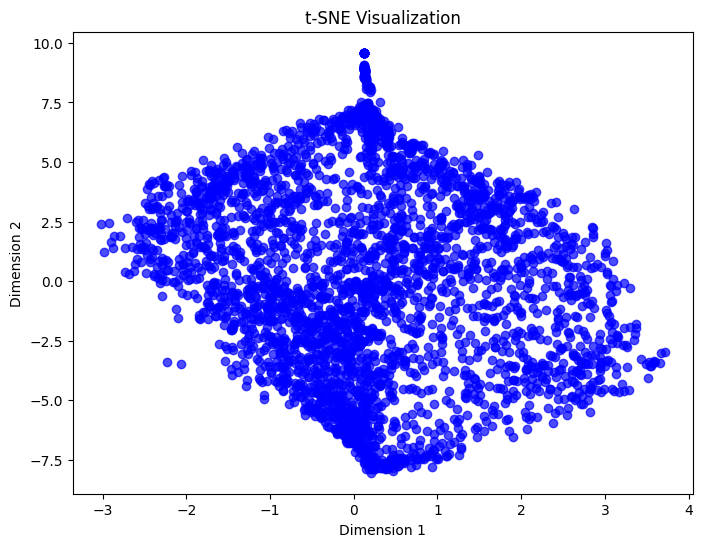

In [20]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

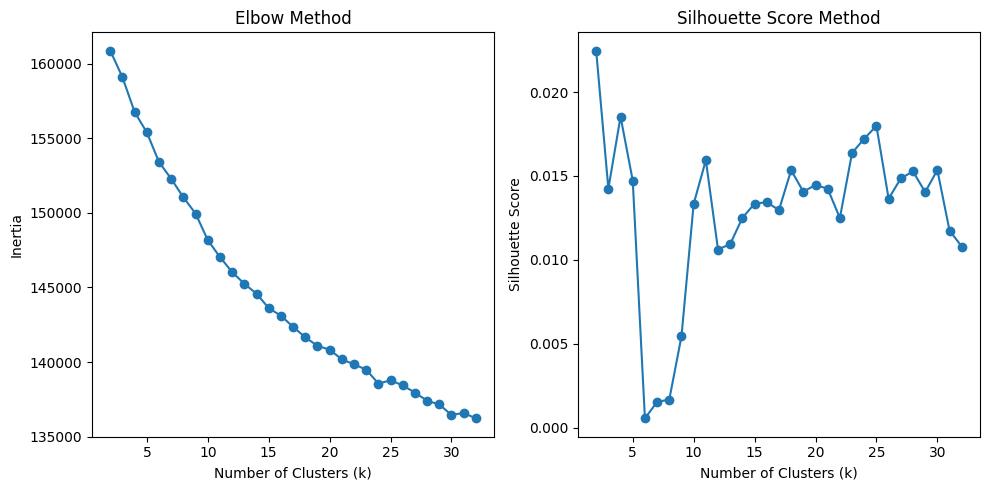

Silhouette Score for 3 clusters: 0.014244281686842442


In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate random data for demonstration (replace with your data)
np.random.seed(0)
#data = np.random.rand(95, 768)

# Step 1: Dimensionality Reduction (PCA)
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Step 2: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 3: Choosing the Number of Clusters (k)
k_values = range(2, 33)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Method to choose k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

# Based on the plots, choose an appropriate value of k

# Step 4: K-means clustering with chosen k
chosen_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(data_scaled)

# Step 5: Evaluate the Results (Silhouette Score)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score for {chosen_k} clusters: {silhouette_avg}")